# Malicious Domain Dataset - Multi-layer Perceptron Classifier

In [35]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
datasource = "preprocessed.csv"
data = pd.read_csv(datasource)
data.Class.value_counts()

0    32613
1     3815
Name: Class, dtype: int64

## Resampling

As the preprocessed dataset is unbalanced, we resample to create a balanced set for training and testing.

In [36]:
from sklearn.utils import resample

sample_size = min(data.Class.value_counts())

malicious = resample(data.loc[data["Class"] == 0], replace=False, n_samples=sample_size, random_state=42)
benign = resample(data.loc[data["Class"] == 1], replace=False, n_samples=sample_size, random_state=42)

balanced = pd.concat([malicious, benign])
balanced.Class.value_counts()

X = balanced.drop(columns=["Class"])
y = balanced["Class"]

## Cross-validation

Here we assess how well an MLP classifier will generalize the dataset by performing 10-fold cross-validation.

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = MLPClassifier(max_iter=500)

stages = [("scaler", StandardScaler()), ("classifier", clf)]
pipeline = Pipeline(stages)

folds = 10
metrics = ["accuracy", "f1", "precision", "recall"]
scores = cross_validate(pipeline, X, y, scoring=metrics, cv=folds)

scores = pd.DataFrame.from_dict(scores)
scores

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall
0,4.442757,0.004187,0.986894,0.986911,0.984334,0.989501
1,5.408572,0.003913,0.979030,0.979058,0.976501,0.981627
2,5.371475,0.003916,0.985583,0.985621,0.981771,0.989501
3,4.593975,0.006249,0.980341,0.980289,0.981579,0.979003
4,5.765515,0.004402,0.977720,0.977720,0.976440,0.979003
5,5.691303,0.004300,0.986894,0.986911,0.986911,0.986911
6,4.815412,0.004292,0.984273,0.984334,0.981771,0.986911
7,5.409888,0.004322,0.981651,0.981771,0.976684,0.986911
8,5.067124,0.004622,0.992136,0.992147,0.992147,0.992147
9,6.070623,0.004222,0.980341,0.980132,0.991957,0.968586


In [38]:
scores.mean()

fit_time          5.263664
score_time        0.004443
test_accuracy     0.983486
test_f1           0.983489
test_precision    0.983009
test_recall       0.984010
dtype: float64

## Finalized Model

In [48]:
clf = MLPClassifier(max_iter=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

stages = [("scaler", StandardScaler()), ("classifier", clf)]
pipeline = Pipeline(stages)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3052 entries, 35222 to 16609
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MXDnsResponse        3052 non-null   int64  
 1   TXTDnsResponse       3052 non-null   int64  
 2   HasSPFInfo           3052 non-null   int64  
 3   HasDmarcInfo         3052 non-null   int64  
 4   DomainInAlexaDB      3052 non-null   int64  
 5   CommonPorts          3052 non-null   int64  
 6   CreationDate         3052 non-null   int64  
 7   LastUpdateDate       3052 non-null   int64  
 8   HttpResponseCode     3052 non-null   int64  
 9   RegisteredOrg        3052 non-null   int64  
 10  SubdomainNumber      3052 non-null   int64  
 11  Entropy              3052 non-null   int64  
 12  EntropyOfSubDomains  3052 non-null   int64  
 13  StrangeCharacters    3052 non-null   int64  
 14  TLD                  3052 non-null   int64  
 15  IpReputation         3052 non-nul

Note: For the above estimator the MLP hyperparameters were left as their default values. Using hyperparameter search methods the model could potentially be further improved.

### Visualizations

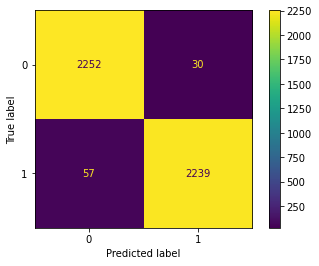

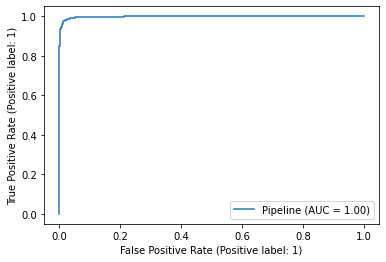

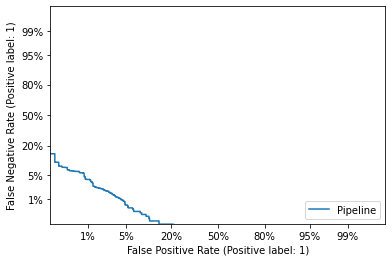

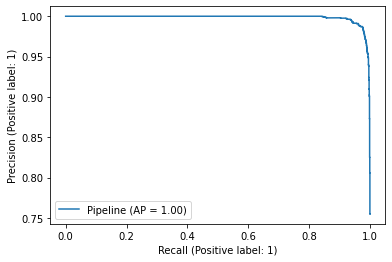

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, DetCurveDisplay

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)

DetCurveDisplay.from_estimator(pipeline, X_test, y_test)